### Assignment 2:  Exploratory Data Analysis (EDA) of bank_churn.csv

In [1]:
#import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#import dataset

df = pd.read_csv('bank_churn.csv')
df.head(10)

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
0,619,France,Female,42,0.00,1,1,101348.88,Churn
1,608,Spain,Female,41,83807.86,1,0,112542.58,Stay
2,502,France,Female,42,159660.80,3,1,113931.57,Churn
3,699,France,Female,39,0.00,2,0,93826.63,Stay
4,850,Spain,Female,43,125510.82,1,1,79084.10,Stay
5,645,Spain,Male,44,113755.78,2,1,149756.71,Churn
6,822,France,Male,50,0.00,2,1,10062.80,Stay
7,376,Germany,Female,29,115046.74,4,1,119346.88,Churn
8,501,France,Male,44,142051.07,2,0,74940.50,Stay
9,684,France,Male,27,134603.88,1,1,71725.73,Stay


In [3]:
df.shape

(10000, 9)

In [4]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
EstimatedSalary    float64
Exited              object
dtype: object

In [5]:
#check missing values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Balance            0
NumOfProducts      0
HasCrCard          0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
#check duplicated rows

df[df.duplicated(keep=False)]

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited


### Conclusion: The data is clean, no missing values and duplicated rows. Proceed to EDA

#### 1. Check the class's proportion of `Exited`, `Gender` and `Geography`. Desribe your findings.

In [7]:
df['Exited'].value_counts()

Stay     7963
Churn    2037
Name: Exited, dtype: int64

In [8]:
df['Exited'].value_counts(normalize=True)

Stay     0.7963
Churn    0.2037
Name: Exited, dtype: float64

In [9]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df['Gender'].value_counts(normalize=True)

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64

In [12]:
#compare the counts of Exited, Gender and Geography

crossTab = pd.crosstab(index = df['Geography'], columns = [df['Exited'], df['Gender']],
                                                           margins=True, margins_name = 'Total')
crossTab

Exited     Churn        Stay        Total
Gender    Female Male Female  Male       
Geography                                
France       460  350   1801  2403   5014
Germany      448  366    745   950   2509
Spain        231  182    858  1206   2477
Total       1139  898   3404  4559  10000

In [13]:
#Calculate the proportion of `Gender` and `Exited` and `Geography`
crossTab = pd.crosstab(index = df['Geography'], columns = [df['Exited'],df['Gender']], normalize= 'columns')
crossTab = pd.crosstab(index = df['Geography'], columns = [df['Exited'],df['Gender']], normalize= 'columns', 
                       margins=True, margins_name = 'Total')
crossTab.round(3)


Exited     Churn          Stay         Total
Gender    Female   Male Female   Male       
Geography                                   
France     0.404  0.390  0.529  0.527  0.501
Germany    0.393  0.408  0.219  0.208  0.251
Spain      0.203  0.203  0.252  0.265  0.248

#### Findings:
1. In all countries, the proportion of `Stay` for both genders is 7963 or 0.796: the comparable figure for`churn` is 2037 or 0.2037 
2. In France, the highest proportion of `Stay` clients among male is 2403/4559 or 0.527 followed by Spain (0.265) and Germany (0.208).
3. The highest proportion of `churn` clients among female is 460/1139 or 0.404 (France) followed by Germany(0.393) and Spain (0.203)

In [14]:

crossTab = pd.crosstab(index = df['Geography'], columns = [df['Exited'],df['Gender']], normalize= 'columns')*100
x = crossTab.round(1)
x

Exited     Churn         Stay      
Gender    Female  Male Female  Male
Geography                          
France      40.4  39.0   52.9  52.7
Germany     39.3  40.8   21.9  20.8
Spain       20.3  20.3   25.2  26.5

<Figure size 576x360 with 0 Axes>

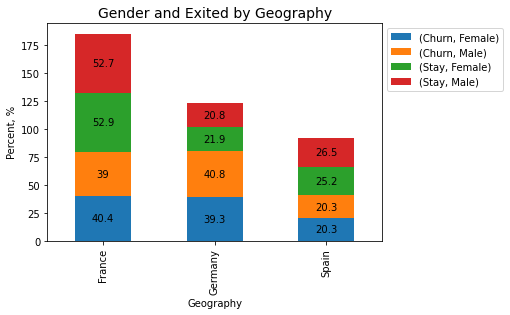

In [15]:
#plot stacked bar 

#figure size
plt.figure(figsize=(8,5))


ax = x.plot(kind='bar', stacked=True)
plt.title('Gender and Exited by Geography', size=14)
plt.ylabel('Percent, %')
plt.legend(loc = 'upper left',  bbox_to_anchor=(1, 1))

# set the bar label
for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.show()


#### 2 Compute mean, median, and standard deviation of `CreditScore` and `Age`

In [16]:
# Compute mean, median and standard deviation of CreditScore

df['CreditScore'].mean()

650.5288

In [17]:
df['CreditScore'].median()

652.0

In [18]:
import statistics as st
st.stdev(df['CreditScore'])

96.65329873613035

In [19]:
#Alternatively, you can compute mean, median and standard deviation of CreditScore by df.describe()


df["CreditScore"].describe().round(2)

count    10000.00
mean       650.53
std         96.65
min        350.00
25%        584.00
50%        652.00
75%        718.00
max        850.00
Name: CreditScore, dtype: float64

In [20]:
# Median Age
df['Age'].median()

37.0

In [21]:
# Mean Age
df['Age'].mean()

38.9218

In [22]:
st.stdev(df['Age'])

10.48780645170461

In [23]:
#Alternatively, you can compute mean, median and std deviation of Age by using df.describe()

df['Age'].describe().round(2)

count    10000.00
mean        38.92
std         10.49
min         18.00
25%         32.00
50%         37.00
75%         44.00
max         92.00
Name: Age, dtype: float64

#### 3 Plot the distribution of `CreditScore` and `Age`. Describe your findings.

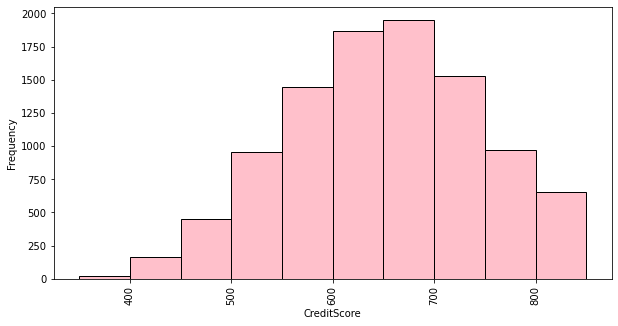

In [24]:
# Distribution of CreditScore


plt.figure(figsize=(10,5))
plt.hist(df['CreditScore'], bins=10, edgecolor='black', color='pink')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.xticks(rotation=90) #rotating the xlabel
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


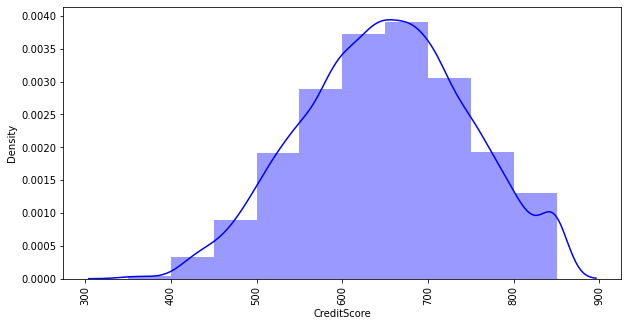

In [25]:
#plot distribution using Seaborn

plt.figure(figsize=(10,5))
sns.distplot(df['CreditScore'], bins=10, color='blue' )
plt.xticks(rotation=90) #rotating the xlabel
plt.show()

### Findings : 
The distribution of `CreditScore` is fairly normally distributed with a slight left skewed which means the mean and median is slightly equal. The mean of `CreditScore` is 650.53 and the median is 652.00.  The standard deviation value indicate that the average spread of `CreditScore` from its mean is about 96.65.

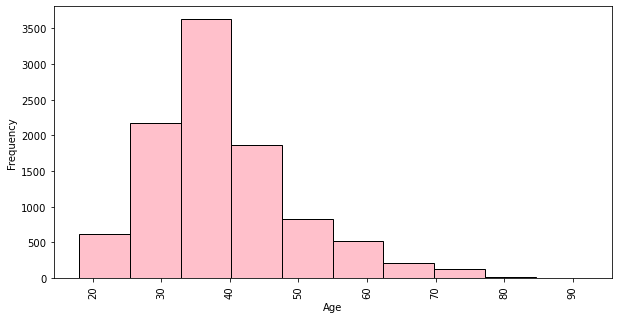

In [26]:
#Distribution of Age


plt.figure(figsize=(10,5))
plt.hist(df['Age'], bins=10, edgecolor='black', color='pink')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=90) #rotating the xlabel
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


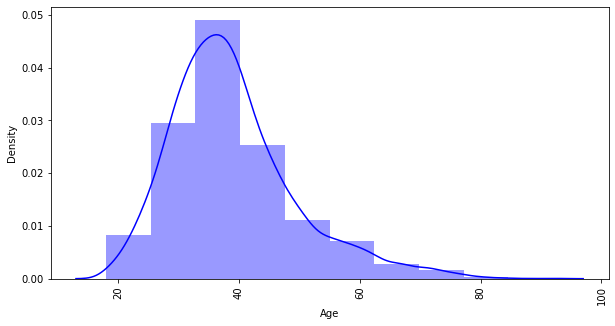

In [27]:
plt.figure(figsize=(10,5))
sns.distplot(df['Age'], bins=10, color='blue' )
plt.xticks(rotation=90) #rotating the xlabel
plt.show()


### Findings
The distribution of `Age` is skewed to the right which means that the mean is larger than the median. The mean of `Age` is 38.92 and the median is 37.00.   The standard deviation value indicate that the average spread of `Age` from its mean is about 10.49.

#### 4. Compute the churn rate of the clients

In [28]:
df['Exited'].value_counts(ascending = True)

Churn    2037
Stay     7963
Name: Exited, dtype: int64

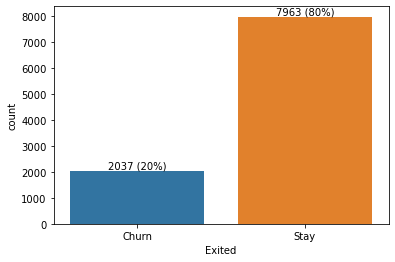

In [29]:
ax = sns.countplot(x='Exited', data=df)

abs_values = df['Exited'].value_counts(ascending = True)
rel_values = df['Exited'].value_counts(ascending = True, normalize=True)*100
labels = [f"{p[0]} ({p[1]:.0f}%)" for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=labels)



plt.show()

### Findings
The churn rate is about 20% which means it has low numbers of clients to stop using the bank's service. 

 #### 5. Is there any correlation between `CreditScore` and `Age`?

In [30]:
#calculate correlation
corr_1 = df['CreditScore'].corr(df['Age'])
corr_1

-0.0039649055253900695

### Finding
The correlation coefficient indicates that there is a negative correlation (-0.003965) between `CreditScore` and `Age`. The `CreditScore` is not affected by `Age`

#### 6. Describe the `Exited` based on `Geography`. Compute the churn rate based on `Geography`.

In [31]:
geo_exited_crossTab = pd.crosstab(index = df['Geography'], columns = df['Exited'], margins=True, margins_name= 'Total')
geo_exited_crossTab

Exited,Churn,Stay,Total
Geography,,,
France,810,4204,5014
Germany,814,1695,2509
Spain,413,2064,2477
Total,2037,7963,10000


In [32]:
geo_exited_crossTab = pd.crosstab(index = df['Geography'], columns = df['Exited'], normalize='index')*100
f = geo_exited_crossTab.round(1)
f

Exited,Churn,Stay
Geography,,
France,16.2,83.8
Germany,32.4,67.6
Spain,16.7,83.3


<Figure size 864x576 with 0 Axes>

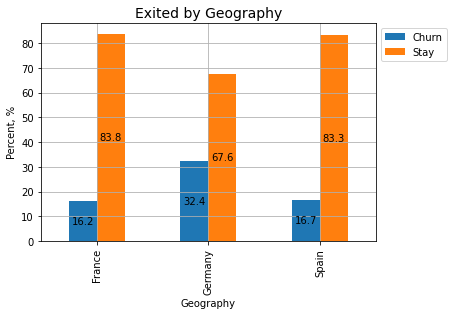

In [33]:
#figure size
plt.figure(figsize=(12,8))


ax = f.plot(kind='bar')
plt.title('Exited by Geography', size=14)
plt.ylabel('Percent, %')
plt.legend(loc = 'upper left',  bbox_to_anchor=(1, 1))
plt.grid(True)

# set the bar label
for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.show()

In [46]:
geo_exited = pd.crosstab(index = df['Geography'], columns = df['Exited'])
geo_exited

Exited,Churn,Stay
Geography,,
France,810,4204
Germany,814,1695
Spain,413,2064


In [45]:
import scipy.stats as stats

geo_exited = pd.crosstab(index = df['Geography'], columns = df['Exited'])

c, p, dof, expected = stats.chi2_contingency(geo_exited)
c, p, dof, expected

(301.25533682434536,
 3.8303176053541544e-66,
 2,
 array([[1021.3518, 3992.6482],
        [ 511.0833, 1997.9167],
        [ 504.5649, 1972.4351]]))

### Findings
1. France has the highest count of client who stay with the bank after 5 years amounting to **4204 or 83.8%**, 
followed Spain(**2064 or 67.6%**) and Germany(**1695 or 83.3%**)

2. Meanwhile Germany has the highest count of clients (**32.4%**) to churn from the bank after 5 years,
followed by Spain (**16.7%**) and France (**16.2%**).  

3. The p-value is 0.00 which is less than 0.05. Accept null hypothesis. There is significant different of churn rate observed between countries. 

4. The churn activity is influence by country. There is higher chances of clients in Germany churn compare to France and Spain. 

#### 7 Investigate if there is a significant different of `CreditScore` between Male and Female

<AxesSubplot:>

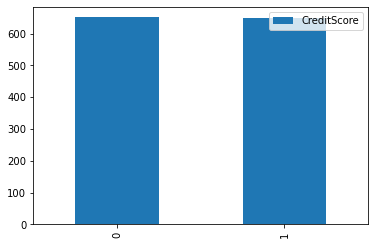

In [48]:
meanCreditScore_Gender = df.groupby('Gender', as_index=False)['CreditScore'].mean()
meanCreditScore_Gender.plot(kind='bar')

In [49]:
meanCreditScore_Gender.round(2)

,Gender,CreditScore
0,Female,650.83
1,Male,650.28


In [34]:
#Check whether CreditScore for Male and Female have equal variance or not using Levene's Test

stats.levene(df['CreditScore'][df['Gender']=='Male'],
             df['CreditScore'][df['Gender']=='Female'],
             center = 'mean'
            )

LeveneResult(statistic=0.0038463214526727116, pvalue=0.9505491651289774)

## Findings
From Levene Test, the p-value is **0.950** which is *$\geq$ 0.05*. This indicates that the variances are not significantly different from each other.The male and female have equal variance of `CreditScore`.

In [35]:
#Evaluate Significant Difference of Mean of CreditScore between male and female using independent t-test


stats.ttest_ind(df['CreditScore'][df['Gender']=='Male'],
             df['CreditScore'][df['Gender']=='Female'])



Ttest_indResult(statistic=-0.2856346098463999, pvalue=0.7751639097068665)

## Findings
1. The p-value is 0.7756, which is > 0.05. 
2. This indicates that the mean `CreditScore` of Male has no significantly difference than the female. 
3. Therefore, we accept null hypothesis (H0).
3. There is no statistically significant different of `CreditScore` between Male and Female. 
4. The`CreditScore`isn't affected by `Gender`


#### 8 Did the `Age` influence `Exited` status of the client?

In [36]:
meanAge= df.groupby('Exited', as_index=False)['Age'].mean()
round(meanAge,2)

,Exited,Age
0,Churn,44.84
1,Stay,37.41


In [37]:
#Check whether Age for Churn and Stay have equal variance or not using Levene's Test

stats.levene(df['Age'][df['Exited']=='Churn'],
             df['Age'][df['Exited']=='Stay'],
             center = 'mean'
            )

LeveneResult(statistic=9.128972569564093, pvalue=0.0025222933821052586)

## Findings:
From Levene Test, the p-value is **0.0025** which is **< 0.05**. This indicates that the exited (churn and stay) have no equal variance of `Age`.

In [38]:
#Evaluate Significant Difference of Mean of Age between Stay and Churn using independent t-test


stats.ttest_ind(df['Age'][df['Exited']=='Stay'],
             df['Age'][df['Exited']=='Churn'], equal_var=False)



Ttest_indResult(statistic=-30.41919720440679, pvalue=4.7127272656641046e-179)

### Findings
p-value obtained from independent T-Test is 0.000 (< 0.05) indicates that the mean `Age` with Churn is  significantly difference** than `Age` with Stay. Accept alternative hypothesis.

The `Age` is significantly affected the`Exited` status. 

#### 9. Did the `CreditScore` influence the `Exited` status of the client?

In [39]:
mean_CreditScore = df.groupby('Exited', as_index=False)['CreditScore'].mean()
round(mean_CreditScore,2)

,Exited,CreditScore
0,Churn,645.35
1,Stay,651.85


In [40]:
#Check whether CreditScore for Churn and Stay have equal variance or not using Levene's Test

stats.levene(df['CreditScore'][df['Exited']=='Churn'],
             df['CreditScore'][df['Exited']=='Stay'],
             center = 'mean'
            )

LeveneResult(statistic=5.500109918359457, pvalue=0.019034723520343893)

### Findings
From Levene Test, the p-value is **0.019** which is **< 0.05**. This indicates that type of Exited have no equal variance of `CreditScore`

In [41]:
#Evaluate Significant Difference of Mean of CreditScore between Stay and Churn using independent t-test


stats.ttest_ind(df['CreditScore'][df['Exited']=='Stay'],
             df['CreditScore'][df['Exited']=='Churn'], equal_var=False)


Ttest_indResult(statistic=2.634660543657579, pvalue=0.008464728991832877)

### Findings
   p-value obtained from independent T-Test is **0.01 (<0.05)** indicates that the mean `CreditScore` with Churn is **statistically significant difference** than `CreditScore` with Stay. Accept alternative hypothesis. 

The `CreditScore` is significantly influenced the `Exited` status. 

#### 10. Investigate if `Male` is likely to churn compare to `Female`.

In [42]:
gender_churn = pd.crosstab(index=df['Gender'], columns = df['Exited'])
gender_churn

Exited,Churn,Stay
Gender,,
Female,1139,3404
Male,898,4559


In [54]:
gender_churn = pd.crosstab(index=df['Gender'], columns = df['Exited'], normalize='columns')*100
gender_churn.round()

Exited,Churn,Stay
Gender,,
Female,56.0,43.0
Male,44.0,57.0


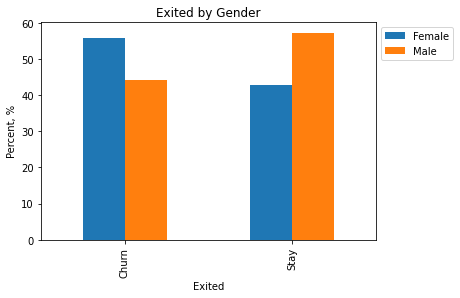

In [43]:
# cross tabulation bar chart

x = pd.crosstab(index=df['Exited'], columns = df['Gender'], normalize='index')*100
x.plot(kind='bar')
plt.title('Exited by Gender')
plt.ylabel('Percent, %')
plt.legend(loc = 'upper left',  bbox_to_anchor=(1, 1))
plt.show()

+ Proportion of male to `churn` is lower than female

In [47]:
import scipy.stats as stats

c, p, dof, expected = stats.chi2_contingency(gender_churn)
p.round(3)

0.0

### Findings

+ The p-value is 0.0 which is less than 0.05. Therefore there is statistically significant difference of proportion between Churn and Stay by Gender
+ Accept alternative hypothesis. 
